# Problem Set 4: Qualitative Explanatory Variables
### Jake lee
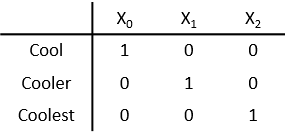

# Problem Set

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

## Question 1
A model that allows major league baseball player salary to differ by position is:

$log(salary) = \beta_0 + \beta_1(years) + \beta_2(gamesyr) + \beta_3(bavg) + \beta_4(hrunsyr) + \beta_5(rbisyr) + \beta_6(runsyr) + \beta_7(fldperc) + \beta_8(allstar) + \beta_9(frstbase) + \beta_10(scndbase) + \beta_11(thrdbase) + \beta_12(shrtstop) + \beta_13(catcher) + ε$

where **outfield is the base group**.

### i) State the null hypothesis that, controlling for other factors, catchers and outfielders earn, on average, the same amount. 

$H_0: \beta_{13} = 0$

### Test this hypothesis using the data in MLB1.DTA and comment on the size of the estimated salary differential.

In [2]:
data = 'MLB1.DTA'
df = pd.read_stata(data)

X = df[['years','gamesyr','bavg','hrunsyr','rbisyr','runsyr','fldperc','allstar','frstbase','scndbase','thrdbase','shrtstop','catcher']]
Y = df['lsalary']

X = sm.add_constant(X)

result = sm.OLS(Y,X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lsalary   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     49.19
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           6.45e-70
Time:                        20:12:32   Log-Likelihood:                -372.46
No. Observations:                 353   AIC:                             772.9
Df Residuals:                     339   BIC:                             827.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1296      2.304      4.830      0.000       6.597      15.662
years          0.0584      0.012      4.760      0.000       0.034       0.083
gamesyr        0.0098      0.003      2.892      0.004       0.003       0.016
bavg           0.0005      0.001      0.422      0.673      -0.002       0.003
hrunsyr        0.0191      0.016      1.199      0.231      -0.012       0.051
rbisyr         0.0018      0.007      0.239      0.811      -0.013       0.016
runsyr         0.0119      0.005      2.623      0.009       0.003       0.021
fldperc        0.0003      0.002      0.123      0.902      -0.004       0.005
allstar        0.0063      0.003      2.198      0.029       0.001       0.012
frstbase      -0.1328      0.131     -1.014      0.311      -0.390       0.125
scndbase      -0.1611      0.141     -1.139      0.255      -0.439       0.117
thrdbase       0.0145      0.143      0.102      0.919      -0.267       0.296
shrtstop      -0.0606      0.130     -0.465      0.642      -0.317       0.196
catcher        0.2536      0.131      1.931      0.054      -0.005       0.512
==============================================================================
Omnibus:                        3.261   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.515
Skew:                           0.084   Prob(JB):                        0.172
Kurtosis:                       3.459   Cond. No.                     6.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the p-value of catcher is 0.054 > 0.05, we cannot reject the null hypothesis. This means there is no  statistically significant difference in salary between outfielders and catchers. 

Note the coefficient on catcher = 0.2536, we can infer that catchers earn 25.36% more than outfielders on average.

### ii) State and test the null hypothesis that there is no difference in average salary across positions, once other factors have been controlled for.

$H_0: \beta_{9} + \beta_{10} + \beta_{11} + \beta_{12} + \beta_{13} = 0$

In [3]:
hypothesis_matrix = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

t_test = result.t_test(hypothesis_matrix)

t_statistic = t_test.tvalue[0]
p_value = t_test.pvalue

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: [-0.21010389]
P-Value: 0.8337128064130124


Since our p-value > 0.10, we fail to reject the null hypothesis and conclude that there is no statistically significant difference between average salarys acorss positions. 

### iii) Are the results from parts (i) and (ii) consistent? If not, explain what is happening.

Yes, Both conlcude that their is no statistically significant difference between average salaries across different positions. This could change if our thresholds are more strict.

## Question 2
Consider the equation:

$colgpa = \beta_0 + \beta_1(hsize) + \beta_2(hsize^2) + \beta_3(hsperc) + \beta_4(sat) + \beta_5(female) + \beta_6(athlete) + ε$

where `colgpa` is cumulative college grade point average, `hsize` is size of high school graduating class (in hundreds), `hsperc` is academic percentile in graduating class, `sat` is combined SAT score, `female` is a binary gender variable, and `athlete` is a binary variable that is one for student-athletes.

### i) What are your expectations for the coefficients in this equation? Which ones are you unsure about?

- `hsize` should not have a strong effect on college gpa
- `hsperc` should be positively because a higher percentile would imply good acadmeic performance
- `sat` should be the strongest positive coefficient because a great SAT score would imply excellent academic perfomance
- `female` and `athlete` should not have too much of an effect on college gpa

### ii) Estimate the equation in part (i) and report the results.

In [4]:
data = 'gpa2.dta'
df = pd.read_stata(data)

X = df[['hsize','hsizesq','hsperc','sat','female','athlete']]
Y = df['colgpa']

X = sm.add_constant(X)

result = sm.OLS(Y,X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colgpa   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     284.6
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          8.63e-306
Time:                        20:12:32   Log-Likelihood:                -3426.3
No. Observations:                4137   AIC:                             6867.
Df Residuals:                    4130   BIC:                             6911.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2414      0.079     15.616      0.000       1.086       1.397
hsize         -0.0569      0.016     -3.477      0.001      -0.089      -0.025
hsizesq        0.0047      0.002      2.079      0.038       0.000       0.009
hsperc        -0.0132      0.001    -23.068      0.000      -0.014      -0.012
sat            0.0016   6.68e-05     24.640      0.000       0.002       0.002
female         0.1549      0.018      8.602      0.000       0.120       0.190
athlete        0.1693      0.042      3.998      0.000       0.086       0.252
==============================================================================
Omnibus:                      183.038   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.139
Skew:                          -0.471   Prob(JB):                     4.76e-50
Kurtosis:                       3.657   Cond. No.                     9.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### What is the estimated GPA differential between athletes and nonathletes? Is it statistically significant?
the estimated differential is 0.169. The p-value is very close to zero so we can assume that being an athlete is a statistically significant variable with respect to gpa holding other factors fixed.

### iii) Drop `sat` from the model and reestimate the equation. Now, what is the estimated effect of being an athlete? Discuss why the estimate is different than that obtained in part (ii).

In [5]:
X = df[['hsize','hsizesq','hsperc','female','athlete']]
Y = df['colgpa']

X = sm.add_constant(X)

result = sm.OLS(Y,X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colgpa   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     191.9
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          2.47e-184
Time:                        20:12:32   Log-Likelihood:                -3710.0
No. Observations:                4137   AIC:                             7432.
Df Residuals:                    4131   BIC:                             7470.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0477      0.033     92.594      0.000       2.983       3.112
hsize         -0.0534      0.018     -3.050      0.002      -0.088      -0.019
hsizesq        0.0053      0.002      2.210      0.027       0.001       0.010
hsperc        -0.0171      0.001    -29.086      0.000      -0.018      -0.016
female         0.0581      0.019      3.089      0.002       0.021       0.095
athlete        0.0054      0.045      0.122      0.903      -0.082       0.093
==============================================================================
Omnibus:                      109.574   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.981
Skew:                          -0.375   Prob(JB):                     3.25e-27
Kurtosis:                       3.382   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Without SAT, the model does not match the data well with R squared of 0.189. Additionaly the p value for athelete is 0.9 which reveals that athelete is no longer statistically significant for estimating college gpa.

### iv) In the model from part (i), allow the effect of being an athlete to differ by gender and test the null hypothesis that there is no ceteris paribus difference between women athletes and women nonathletes.

Base Group: `female_non_athletes`

$H_0$: coefficients on `female_athlete` and `female_non_athletes` = 0

In [6]:
#female_athlete
df['female_athlete'] = df.apply(lambda row: 1 if (row['female'] == 1) and (row['athlete'] == 1) else 0, axis=1)

#female_non_athlete
df['female_n_athlete'] = df.apply(lambda row: 1 if (row['female'] == 1) and (row['athlete'] == 0) else 0, axis=1)

#male_athlete
df['male_athlete'] = df.apply(lambda row: 1 if (row['female'] == 0) and (row['athlete'] == 1) else 0, axis=1)

#male_not_athlete
df['male_n_athlete'] = df.apply(lambda row: 1 if (row['female'] == 0) and (row['athlete'] == 0) else 0, axis=1)

In [7]:
X = df[['hsize','hsizesq','hsperc','sat','female_athlete','male_athlete','male_n_athlete']]
Y = df['colgpa']

X = sm.add_constant(X)

result = sm.OLS(Y,X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colgpa   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.9
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          1.51e-304
Time:                        20:12:32   Log-Likelihood:                -3426.3
No. Observations:                4137   AIC:                             6869.
Df Residuals:                    4129   BIC:                             6919.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3962      0.076     18.478      0.000       1.248       1.544
hsize             -0.0568      0.016     -3.470      0.001      -0.089      -0.025
hsizesq            0.0047      0.002      2.075      0.038       0.000       0.009
hsperc            -0.0132      0.001    -23.056      0.000      -0.014      -0.012
sat                0.0016   6.69e-05     24.618      0.000       0.002       0.002
female_athlete     0.1751      0.084      2.084      0.037       0.010       0.340
male_athlete       0.0128      0.049      0.263      0.793      -0.083       0.108
male_n_athlete    -0.1546      0.018     -8.443      0.000      -0.191      -0.119
==============================================================================
Omnibus:                      183.109   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.240
Skew:                          -0.471   Prob(JB):                     4.52e-50
Kurtosis:                       3.657   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficient on `female_athelete` is 0.175 with a p value of 0.010 < 0.05 implying that we can reject the null hypothesis and conclude that there is a statistically significant difference between female athelets college gpas and non female athletes college gpas. 

### v) Does the effect of `sat` on `colgpa` differ by gender? Justify your answer
$H_0:$ `sat` * coefficient on `female_athlete` = 0

In [8]:
X = df[['hsize','hsizesq','hsperc','sat','female_athlete','male_athlete','male_n_athlete']]

# add interaction term
X['gender_sat_interaction'] = X['sat'] * X['female_athlete']

Y = df['colgpa']

X = sm.add_constant(X)

result = sm.OLS(Y,X).fit()

result.summary()


/var/folders/p9/93z3csys0wvdgpmby0q6v4z00000gp/T/ipykernel_3681/2174364516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender_sat_interaction'] = X['sat'] * X['female_athlete']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 colgpa   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     213.3
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          2.39e-303
Time:                        20:12:32   Log-Likelihood:                -3426.3
No. Observations:                4137   AIC:                             6871.
Df Residuals:                    4128   BIC:                             6928.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.3980      0.076     18.393      0.000       1.249       1.547
hsize                     -0.0568      0.016     -3.467      0.001      -0.089      -0.025
hsizesq                    0.0047      0.002      2.072      0.038       0.000       0.009
hsperc                    -0.0132      0.001    -23.054      0.000      -0.014      -0.012
sat                        0.0016   6.74e-05     24.397      0.000       0.002       0.002
female_athlete             0.0736      0.476      0.155      0.877      -0.860       1.007
male_athlete               0.0126      0.049      0.259      0.796      -0.083       0.108
male_n_athlete            -0.1545      0.018     -8.435      0.000      -0.190      -0.119
gender_sat_interaction     0.0001      0.001      0.217      0.829      -0.001       0.001
==============================================================================
Omnibus:                      183.314   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.564
Skew:                          -0.471   Prob(JB):                     3.85e-50
Kurtosis:                       3.658   Cond. No.                     5.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the p value of our interaction variable > 0.05, we can reject the null and conclude that there is no effect on gpa by sat scores by gender.

## Question 3
Consider a model to explain salaries of CEOs:

$log(salary) = \beta_0 + \beta_1(log(sales)) + \beta_2(roe) + \beta_3(rosneg) + ε$

 - `sales` is annual firm sales
 - `roe` is return on equity (in percentage form)
 - `ros` is return on the firm’s stock (in percentage form).
 - `rosneg` is a dummy variable, which is equal to one if `ros` < 0 and equal to zero if `ros` ≥ 0

Use `CEOSAL1.DTA` to estimate the model.

In [9]:
data = 'CEOSAL1.DTA'
df = pd.read_stata(data)

# create rosneg
df['rosneg'] = df.apply(lambda row: 1 if (row['ros'] < 0) else 0, axis=1)

# model
X = df[['lsales','roe','rosneg']]

Y = df['lsalary']

X = sm.add_constant(X)

result = sm.OLS(Y,X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lsalary   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     28.81
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.37e-15
Time:                        20:12:32   Log-Likelihood:                -140.47
No. Observations:                 209   AIC:                             288.9
Df Residuals:                     205   BIC:                             302.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2976      0.293     14.655      0.000       3.719       4.876
lsales         0.2884      0.034      8.579      0.000       0.222       0.355
roe            0.0167      0.004      4.198      0.000       0.009       0.024
rosneg        -0.2257      0.109     -2.064      0.040      -0.441      -0.010
==============================================================================
Omnibus:                       97.645   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              566.341
Skew:                           1.720   Prob(JB):                    1.05e-123
Kurtosis:                      10.294   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### i) Discuss the interpretation and statistical significance of $\beta_3$
This model predicts the salary of a CEO given certain factors. Specifically, the return on stock variable can help us predict salary given that the return on stock is negative or positive. From the model, the coefficient on `rosneg` is -0.225, implying that, holding other factors fixed, the average salary for CEOs is predicted to be 23% lower if their firm has a negative return on stock. If a CEOs firm has a positive return on stock they are predicted to have a 23% higher salary.

But is this statistically significant? Since our p-value = 0.040 < 0.05, we can reject a null hypothesis that `rosneg` has no effect on salary ($ H_0: \beta_3 = 0 $) and conclude that a negative return on stock is significant.

# Lecture Notes
### Implementation
Implementing Qualitative Factors is often neccessary to include in regressions. 

They often come in a binary form
 - male or female
 - owns or does not own
 
 Dummy variables are used to define outcomes with zeros and ones (1 or 0).
 
### Dummy variable trap
Given $wage = \beta_0 + \delta_0(female) + \beta_1(educ) + \epsilon$

The co-efficient of the dummy variable female, $\delta_0$, represents intercept shift between males and females. In other words $\delta_0$ is the **difference in intercepts between females and males**

 $\delta_0$ = $\ E[wage | female = 1, educ] - E[wage | female = 0, educ]$
 
= $\ E[wage | female, educ] - E[wage | male, educ]$
 
 **Note**: We do NOT include a dummy variable for male (male=1,female=0)
 
 intercept for males is already $\beta_0$ and females is $\beta_0 + \delta_0$
 
 If both dummys were to be included it would imply perfect collinearity => the dummy trap
 
For example, 

$wage = \beta_0 + \delta_0(female) + \beta_1(educ) + \epsilon$

males is the base group against which comparisons are made. Again, $\beta_0$ is the intercept for males and $\delta_0$ is the difference in intercepts between females and males.

### Ex) Wage discrimination
$wage = \beta_0 + \delta_0(female) + \beta_1(educ) + \beta_2(exper) + \epsilon$

- $H_0: \delta_0 = 0$, no difference between men and women
- $H_1: \delta_0 < 0$, women are discriminated

### How to test?
- OLS
- t-test for testing the hypothesis
- statistical inference remains the same for using dummys

### Dummy Variables for Multiple Categories
Consider, 

$ln(wage) = \beta_0 + \delta_1(marriedmale) + \delta_2(marriedfemale) + \delta_3(singlefemale) +
\beta_1(educ) + \beta_2(exper) + \beta_3(exper2) + \beta_4 (tenure) + \beta_5(tenure2) + \epsilon$

where singlemale is the base group. 

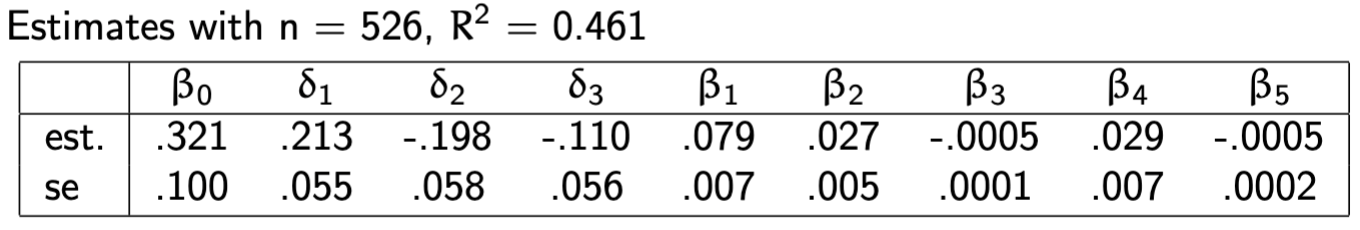

Ceterus Paribus (holding educ, exper, and tunure constant) this estimates:
- married men earn 21.3% more than single men 
- married women earn 19.8% less than single men


## Interpreting coefficients when the dependent variable is log(y)

---
level-level: (y,x): $\Delta$y = $\beta_1$$\Delta$x

level-log: (y, log(x)): $\Delta$y = $\beta_1/100$%$\Delta$x
    
log-level (log(y),x): %$\Delta$y = $100\beta_1$%$\Delta$x
    
log-log (log(y), log(x)): %$\Delta$y = $\beta_1$%$\Delta$x,

*Note:
In the log-log model, $\beta_1$ is the **elasticity** of y with respect to x*

---

When log(y) is the dependent variable in a model, the coefficient on a dummy variable (after multiplied by 100) is interpreted as the percentage difference in y, holding other factors fixed.

For example: log(price) = -1.35 + .168 log(size) + . . . + 0.54 colonial. colonial is a binary variable denoting if the house is of colonial style (1) or not (0). The coefficient means the difference in log(price) for a house of colonial style and not is 0.54, so a colonial house is predicted to sell for 5.4% more, holding other independent variables fixed. 

## Log Hourly Wage Example
Now we are ready for a multi category multiple regression analysis:

4 groups with base group as single men:
- married men, marrmale
- married females, marrfemale
- **single men**
- single women, singfem

log(wage) = 0.321 + 0.213 marrmale - 0.198 marrfem - 0.110 singfem + 0.079 educ + 0.027 exper + . . . + e,

---
log-level (log(y),x): %$\Delta$y = $100\beta_1$%$\Delta$x

---

Given that all coefficients are statisitically significant, we can move onto interpretation. The estimates on the 3 dummys measure the proportionate difference in wage *relative* to single males. We can thus observe:
- married men are estimated to earn about 21.3% than single men
- married females are estimated to earn 19% less than single men
- single females are estimated to earn 11% less than single men

*note that these estimates are holding all other factors fixed, (same levels of other variables)*

- the estimated proportionate difference between single and married women is -.110 - (-.198) = 0.088, meaning that single women earn about 8.8% more than married women.


## Chow Test
The chow test can be used to detect whether there are any differencees across groups. In many cases it is more interesting to test whether, after allowing for an intercept difference, the slopes for two different groups are the same. This can be accomplished by a standard F test. 

## Summary
Dummy variables are used to distinguish between two groups, and the coeefficient estimates on them tell us the difference between those two groups. Those groups can be expanded as long as a base case is defined. Very useful for implementing qualtitative information into a regression analysis.